In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# From Sofi
def shortest_interval_68(data, center_type='mean'):
    """
    Compute the shortest interval that contains 68% of the data.
    """
    data = np.sort(data)
    n = len(data)
    ci_size = int(np.floor(0.68 * n))
    min_width = float("inf")
    min_i = 0

    for i in range(n - ci_size):
        width = data[i + ci_size] - data[i]
        if width < min_width:
            min_width = width
            min_i = i

    low = data[min_i]
    high = data[min_i + ci_size]

    if center_type == 'mean':
        center = np.mean(data)
    else:
        center = np.median(data)

    return {
        "center": center,
        "error_low": float(center - low),
        "error_high": float(high - center),
        "center_type": center_type
    }

In [3]:
colors = ['tab:blue']

In [4]:
def residual_plot(ax, thisdf, var1, var2, name, lims=[-1,1]):

    print(var1, var2)
    
    nbins = 11 
    [xmin, xmax] = lims 
    step = 1.0*(xmax-xmin)/nbins

    bins = np.linspace(xmin,xmax,nbins)[:-1] + step/2
    
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('Predicted - true ' + name)
    
    means = []
    up68 = []
    down68 = []
    upbar = []
    downbar = []
    
    for i in range(0,nbins-1):

        df_i = thisdf[(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)]
        
        means += [np.mean(df_i['residual'+var2])]
        interval68 =shortest_interval_68(df_i['residual'+var2], center_type='mean')
        up68 += [interval68['error_high']]
        down68 += [interval68['error_low']]
        upbar += [means[i] + np.mean(df_i['upsigma'+var2])]
        downbar += [means[i] - np.mean(df_i['downsigma'+var2])]

    ax.plot([xmin+step/2,xmax-step/2],[0,0],color='black',linestyle=':')
    if var2 == "x":
        ax.plot([xmin+step/2,xmax-step/2],[50/np.sqrt(12),50/np.sqrt(12)],color='black',linestyle=':')
        ax.plot([xmin+step/2,xmax-step/2],[-50/np.sqrt(12),-50/np.sqrt(12)],color='black',linestyle=':')
    if var2 == "y":
        ax.plot([xmin+step/2,xmax-step/2],[12.5/np.sqrt(12),12.5/np.sqrt(12)],color='black',linestyle=':')
        ax.plot([xmin+step/2,xmax-step/2],[-12.5/np.sqrt(12),-12.5/np.sqrt(12)],color='black',linestyle=':')
    
    #ax.errorbar(x=bins,y=means,yerr=[down68,up68],linestyle='',marker='o',markersize=3)
    line = ax.plot(bins,means,marker='o',markersize=3)
    ax.fill_between(x=bins,y1=upbar,y2=downbar, alpha=0.2)

    return line


/tmp/ipykernel_3654848/443114091.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


xtrue x
ytrue y
Atrue A
Btrue B


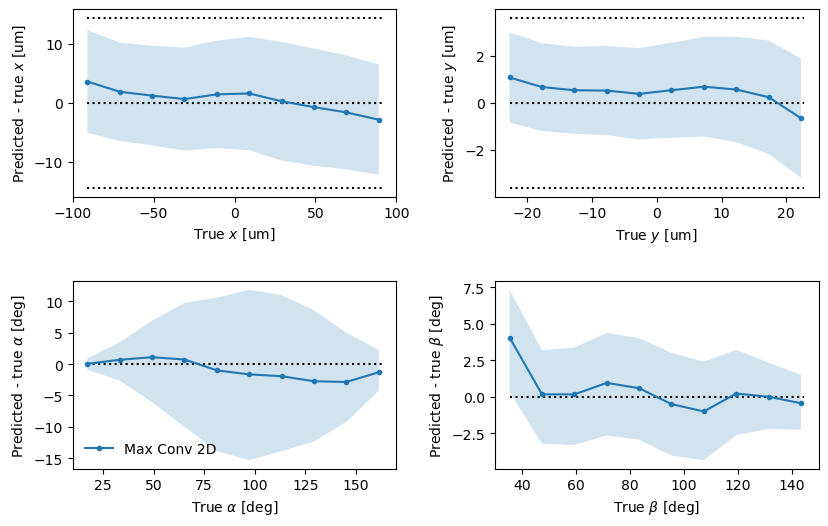

In [5]:
models = ["max_2dconv_noquant_2t"]
names = {"max_2dconv_noquant_2t":'Max Conv 2D'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    for v in ['x','y']:
        df['upsigma'+v] = df['sigma'+v]
        df['downsigma'+v] = df['sigma'+v]

    lines += residual_plot(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
    dump += residual_plot(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
    dump += residual_plot(axes[1][0],df,'Atrue','A',r'$\alpha$ [deg]',lims=[10,170])
    dump += residual_plot(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

plt.savefig("plots/residuals_max.png")
plt.savefig("plots/residuals_max.pdf")


/tmp/ipykernel_3654848/1105350177.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


xtrue x
ytrue y
Atrue A
Btrue B
xtrue x
ytrue y
Atrue A
Btrue B
xtrue x
ytrue y
Atrue A
Btrue B


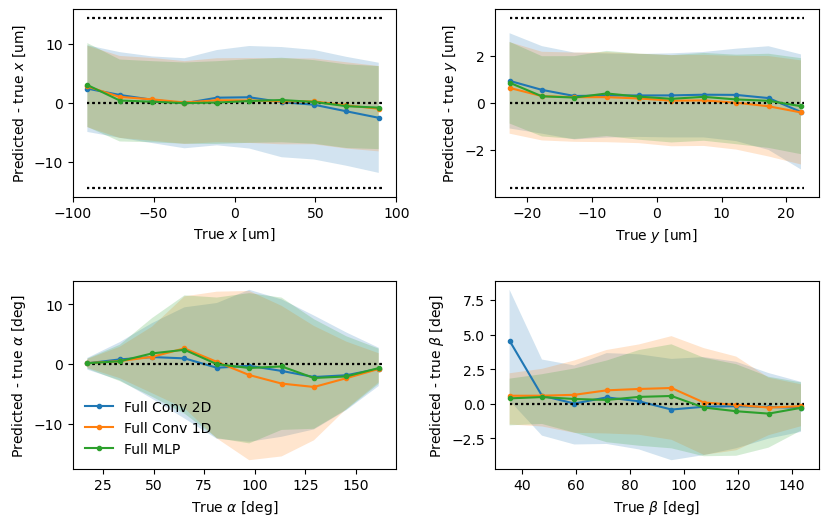

In [6]:
models = ["full_2dconv_noquant_2t",
          "full_1dconv_noquant_2t",
          "full_mlp_noquant_2t"]
names = {"full_2dconv_noquant_2t":'Full Conv 2D',
         "full_1dconv_noquant_2t":'Full Conv 1D',
         "full_mlp_noquant_2t":'Full MLP'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    for v in ['x','y']:
        df['upsigma'+v] = df['sigma'+v]
        df['downsigma'+v] = df['sigma'+v]

    lines += residual_plot(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
    dump += residual_plot(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
    dump += residual_plot(axes[1][0],df,'Atrue','A',r'$\alpha$ [deg]',lims=[10,170])
    dump += residual_plot(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

plt.savefig("plots/residuals_full.png")
plt.savefig("plots/residuals_full.pdf")

In [13]:
def residual_plot_slim(ax, thisdf, var1, var2, name, lims=[-1,1]):
    
    nbins = 11 
    [xmin, xmax] = lims 
    step = 1.0*(xmax-xmin)/nbins

    bins = np.linspace(xmin,xmax,nbins)[:-1] + step/2
    
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('Predicted - true ' + name)
    
    means = []
    up68 = []
    down68 = []
    upbar = []
    downbar = []
    
    for i in range(0,nbins-1):

        df_i = thisdf[(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)]
        
        means += [np.mean(df_i['residual'+var2])]
        interval68 =shortest_interval_68(df_i['residual'+var2], center_type='mean')
        up68 += [interval68['error_high']]
        down68 += [interval68['error_low']]

    ax.plot([xmin+step/2,xmax-step/2],[0,0],color='black',linestyle=':')
    if var2 == "x":
        ax.plot([xmin+step/2,xmax-step/2],[50/np.sqrt(12),50/np.sqrt(12)],color='black',linestyle=':')
        ax.plot([xmin+step/2,xmax-step/2],[-50/np.sqrt(12),-50/np.sqrt(12)],color='black',linestyle=':')
    if var2 == "y":
        ax.plot([xmin+step/2,xmax-step/2],[12.5/np.sqrt(12),12.5/np.sqrt(12)],color='black',linestyle=':')
        ax.plot([xmin+step/2,xmax-step/2],[-12.5/np.sqrt(12),-12.5/np.sqrt(12)],color='black',linestyle=':')
        
    line = ax.errorbar(x=bins,y=means,yerr=[down68,up68],marker='o',markersize=3,capsize=2)
    #line = ax.plot(bins,means,marker='o',markersize=3)
    #ax.fill_between(x=bins,y1=upbar,y2=downbar, alpha=0.2)

    return [line]


/tmp/ipykernel_3654848/3412361013.py:9: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


[<ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>, <ErrorbarContainer object of 3 artists>]


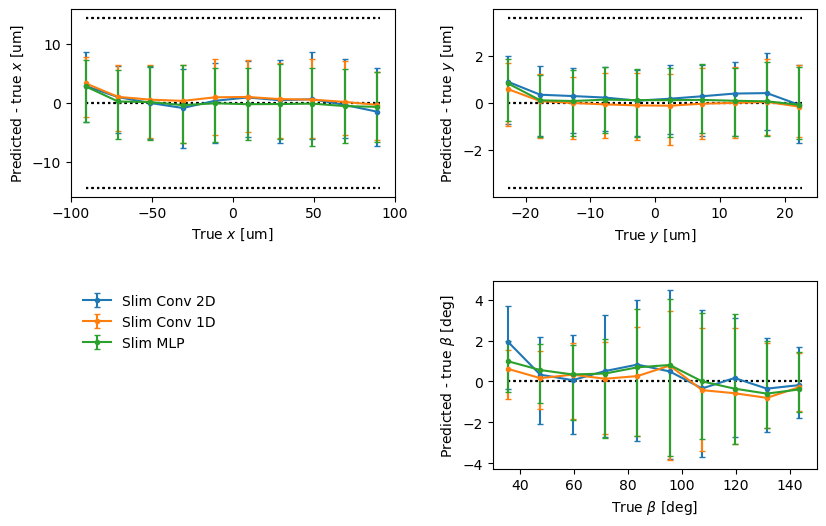

In [14]:
models = ["slim_2dconv_noquant_2t",
          "slim_1dconv_noquant_2t",
          "slim_mlp_noquant_2t"]
names = {"slim_2dconv_noquant_2t":'Slim Conv 2D',
         "slim_1dconv_noquant_2t":'Slim Conv 1D',
         "slim_mlp_noquant_2t":'Slim MLP'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

axes[1,0].axis('off')

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')
    
    lines += residual_plot_slim(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
    dump += residual_plot_slim(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
    dump += residual_plot_slim(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

print(lines)

axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='upper left')

plt.savefig("plots/residuals_slim.png")
plt.savefig("plots/residuals_slim.pdf")

/tmp/ipykernel_3654848/975076785.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


xtrue x
ytrue y
Atrue A
Btrue B
xtrue x
ytrue y
Atrue A
Btrue B


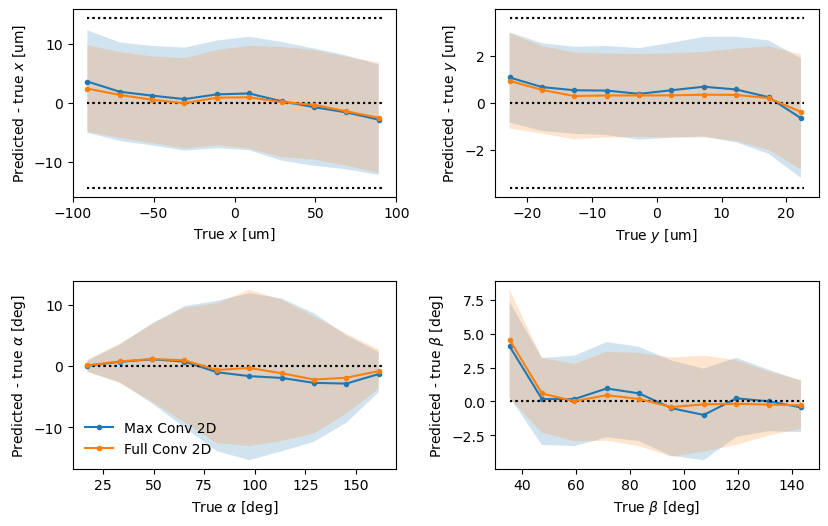

In [9]:
models = ["max_2dconv_noquant_2t",
          "full_2dconv_noquant_2t"]
names = {"max_2dconv_noquant_2t":'Max Conv 2D',
         "full_2dconv_noquant_2t":'Full Conv 2D'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    for v in ['x','y']:
        df['upsigma'+v] = df['sigma'+v]
        df['downsigma'+v] = df['sigma'+v]

    lines += residual_plot(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
    dump += residual_plot(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
    dump += residual_plot(axes[1][0],df,'Atrue','A',r'$\alpha$ [deg]',lims=[10,170])
    dump += residual_plot(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

plt.savefig("plots/residuals_2dconv.png")
plt.savefig("plots/residuals_2dconv.pdf")

/tmp/ipykernel_3654848/1899711175.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


xtrue x
ytrue y
Atrue A
Btrue B
[<matplotlib.lines.Line2D object at 0x7fc9f3e60710>, <ErrorbarContainer object of 3 artists>]


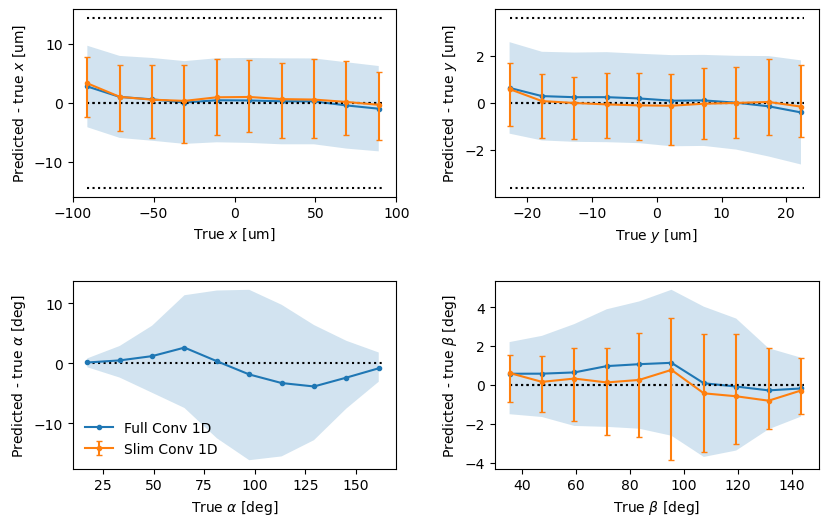

In [10]:
models = ["full_1dconv_noquant_2t",
          "slim_1dconv_noquant_2t"]
names = {"full_1dconv_noquant_2t":'Full Conv 1D',
         "slim_1dconv_noquant_2t":'Slim Conv 1D'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    if "slim" not in m:

        for v in ['x','y']:
            df['upsigma'+v] = df['sigma'+v]
            df['downsigma'+v] = df['sigma'+v]
            
        lines += residual_plot(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
        dump += residual_plot(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
        dump += residual_plot(axes[1][0],df,'Atrue','A',r'$\alpha$ [deg]',lims=[10,170])
        dump += residual_plot(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])
    else:
        lines += residual_plot_slim(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
        dump += residual_plot_slim(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
        dump += residual_plot_slim(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

print(lines)
axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

plt.savefig("plots/residuals_1dconv.png")
plt.savefig("plots/residuals_1dconv.pdf")

/tmp/ipykernel_3654848/163787007.py:7: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


xtrue x
ytrue y
Atrue A
Btrue B
[<matplotlib.lines.Line2D object at 0x7fc9e80dc4a0>, <ErrorbarContainer object of 3 artists>]


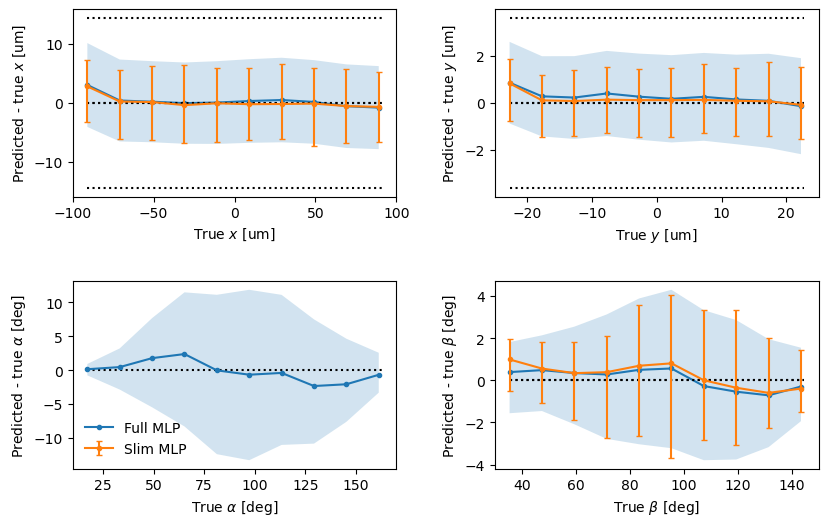

In [11]:
models = ["full_mlp_noquant_2t",
          "slim_mlp_noquant_2t"]
names = {"full_mlp_noquant_2t":'Full MLP',
         "slim_mlp_noquant_2t":'Slim MLP'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    if "slim" not in m:

        for v in ['x','y']:
            df['upsigma'+v] = df['sigma'+v]
            df['downsigma'+v] = df['sigma'+v]
            
        lines += residual_plot(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
        dump += residual_plot(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
        dump += residual_plot(axes[1][0],df,'Atrue','A',r'$\alpha$ [deg]',lims=[10,170])
        dump += residual_plot(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])
    else:
        lines += residual_plot_slim(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
        dump += residual_plot_slim(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
        dump += residual_plot_slim(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

print(lines)
axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

plt.savefig("plots/residuals_mlp.png")
plt.savefig("plots/residuals_mlp.pdf")

/tmp/ipykernel_3654848/3709258180.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


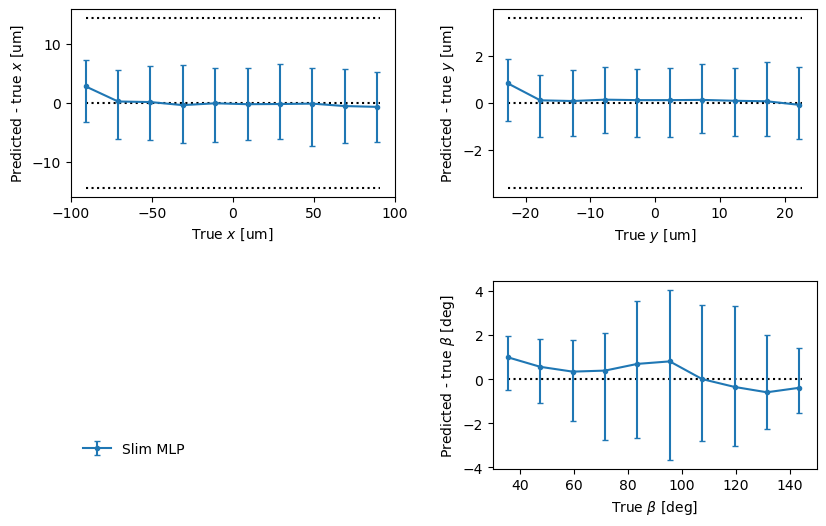

In [16]:
models = ["slim_mlp_noquant_2t"]
names = {"slim_mlp_noquant_2t":'Slim MLP'}

fig, axes = plt.subplots(2,2,figsize=(9,8*9/12),constrained_layout=True)
fig.tight_layout(pad=4.0)
axes[1,0].axis('off')

lines = []
dump = []

for m in models:

    df = pd.read_parquet(m+'.parquet')

    lines += residual_plot_slim(axes[0][0],df,'xtrue','x',r'$x$ [um]',lims = [-100,100])
    dump += residual_plot_slim(axes[0][1],df,'ytrue','y',r'$y$ [um]',lims=[-25,25])
    dump += residual_plot_slim(axes[1][1],df,'Btrue','B',r'$\beta$ [deg]',lims=[30,150])

axes[1][0].legend(lines,[names[m] for m in models], frameon=False, loc='lower left')

#plt.savefig("plots/residuals_max.png")
#plt.savefig("plots/residuals_max.pdf")